# Stock Price Download and Exploratory Data Analysis

This notebook demonstrates:
1. Downloading stock price data from Yahoo Finance
2. Basic exploratory data analysis
3. Visualizing price trends and volumes

In [1]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from src.download_prices import download_prices
from src.utils import calculate_returns, calculate_volatility
from src.safe_file_utils import safe_savefig_plt, safe_to_csv

# Create necessary directories
Path('../reports/figures').mkdir(parents=True, exist_ok=True)
Path('../data/raw').mkdir(parents=True, exist_ok=True)

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

%matplotlib inline

print("✓ Setup complete - directories created")

✓ Setup complete - directories created


## 1. Download Price Data

In [2]:
# Define tickers to analyze
TICKERS = ['MSFT', 'AAPL', 'NVDA', 'GOOGL', 'AMZN']
START_DATE = '2015-01-01'
OUTPUT_PATH = '../data/raw/prices.parquet'

# Download data
prices_df = download_prices(
    tickers=TICKERS,
    start_date=START_DATE,
    output_path=OUTPUT_PATH
)

print(f"\nDownloaded {len(prices_df)} rows")
prices_df.head()

Downloading:   0%|          | 0/5 [00:00<?, ?it/s]/Users/khoinguyenpham/Library/CloudStorage/OneDrive-CalPolyPomona/CS4200/Stock Prediction/notebooks/../src/download_prices.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)
Downloading:  20%|██        | 1/5 [00:00<00:01,  2.47it/s]/Users/khoinguyenpham/Library/CloudStorage/OneDrive-CalPolyPomona/CS4200/Stock Prediction/notebooks/../src/download_prices.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)
Downloading:  40%|████      | 2/5 [00:00<00:00,  3.19it/s]/Users/khoinguyenpham/Library/CloudStorage/OneDrive-CalPolyPomona/CS4200/Stock Prediction/notebooks/../src/download_prices.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_d


Saved 13725 rows to ../data/raw/prices.parquet
Tickers: ['AAPL', 'AMZN', 'GOOGL', 'MSFT', 'NVDA']
Date range: 2015-01-02 00:00:00 to 2025-12-01 00:00:00

Downloaded 13725 rows


Price,Date,Close,High,Low,Open,Volume,ticker
0,2015-01-02,24.237547,24.705316,23.798597,24.694231,212818400,AAPL
1,2015-01-05,23.554741,24.086801,23.368521,24.006992,257142000,AAPL
2,2015-01-06,23.556957,23.816336,23.195599,23.619031,263188400,AAPL
3,2015-01-07,23.887280,23.987040,23.654503,23.765348,160423600,AAPL
4,2015-01-08,24.805084,24.862725,24.097887,24.215385,237458000,AAPL


## 2. Data Overview

In [3]:
# Basic info
print("Dataset shape:", prices_df.shape)
print("\nColumns:", prices_df.columns.tolist())
print("\nTickers:", prices_df['ticker'].unique())
print("\nDate range:", prices_df['Date'].min(), "to", prices_df['Date'].max())
print("\nMissing values:")
print(prices_df.isnull().sum())

Dataset shape: (13725, 7)

Columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'ticker']

Tickers: ['AAPL' 'AMZN' 'GOOGL' 'MSFT' 'NVDA']

Date range: 2015-01-02 00:00:00 to 2025-12-01 00:00:00

Missing values:
Price
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
ticker    0
dtype: int64


In [4]:
# Summary statistics
prices_df[['Open', 'High', 'Low', 'Close', 'Volume']].describe()

Price,Open,High,Low,Close,Volume
count,13725.000000,13725.000000,13725.000000,13725.000000,1.372500e+04
mean,108.714074,109.885414,107.510660,108.744031,1.393202e+08
std,99.785603,100.698923,98.809311,99.789107,1.969946e+08
min,0.463602,0.467921,0.454483,0.459282,7.164500e+06
25%,36.032879,36.383062,35.672809,36.104000,3.097940e+07
50%,83.250000,84.343846,81.787272,83.120003,5.787230e+07
75%,159.321022,161.199997,157.201004,159.253494,1.461441e+08
max,553.283183,553.502444,539.759814,541.057373,3.692928e+09


## 3. Price Visualization

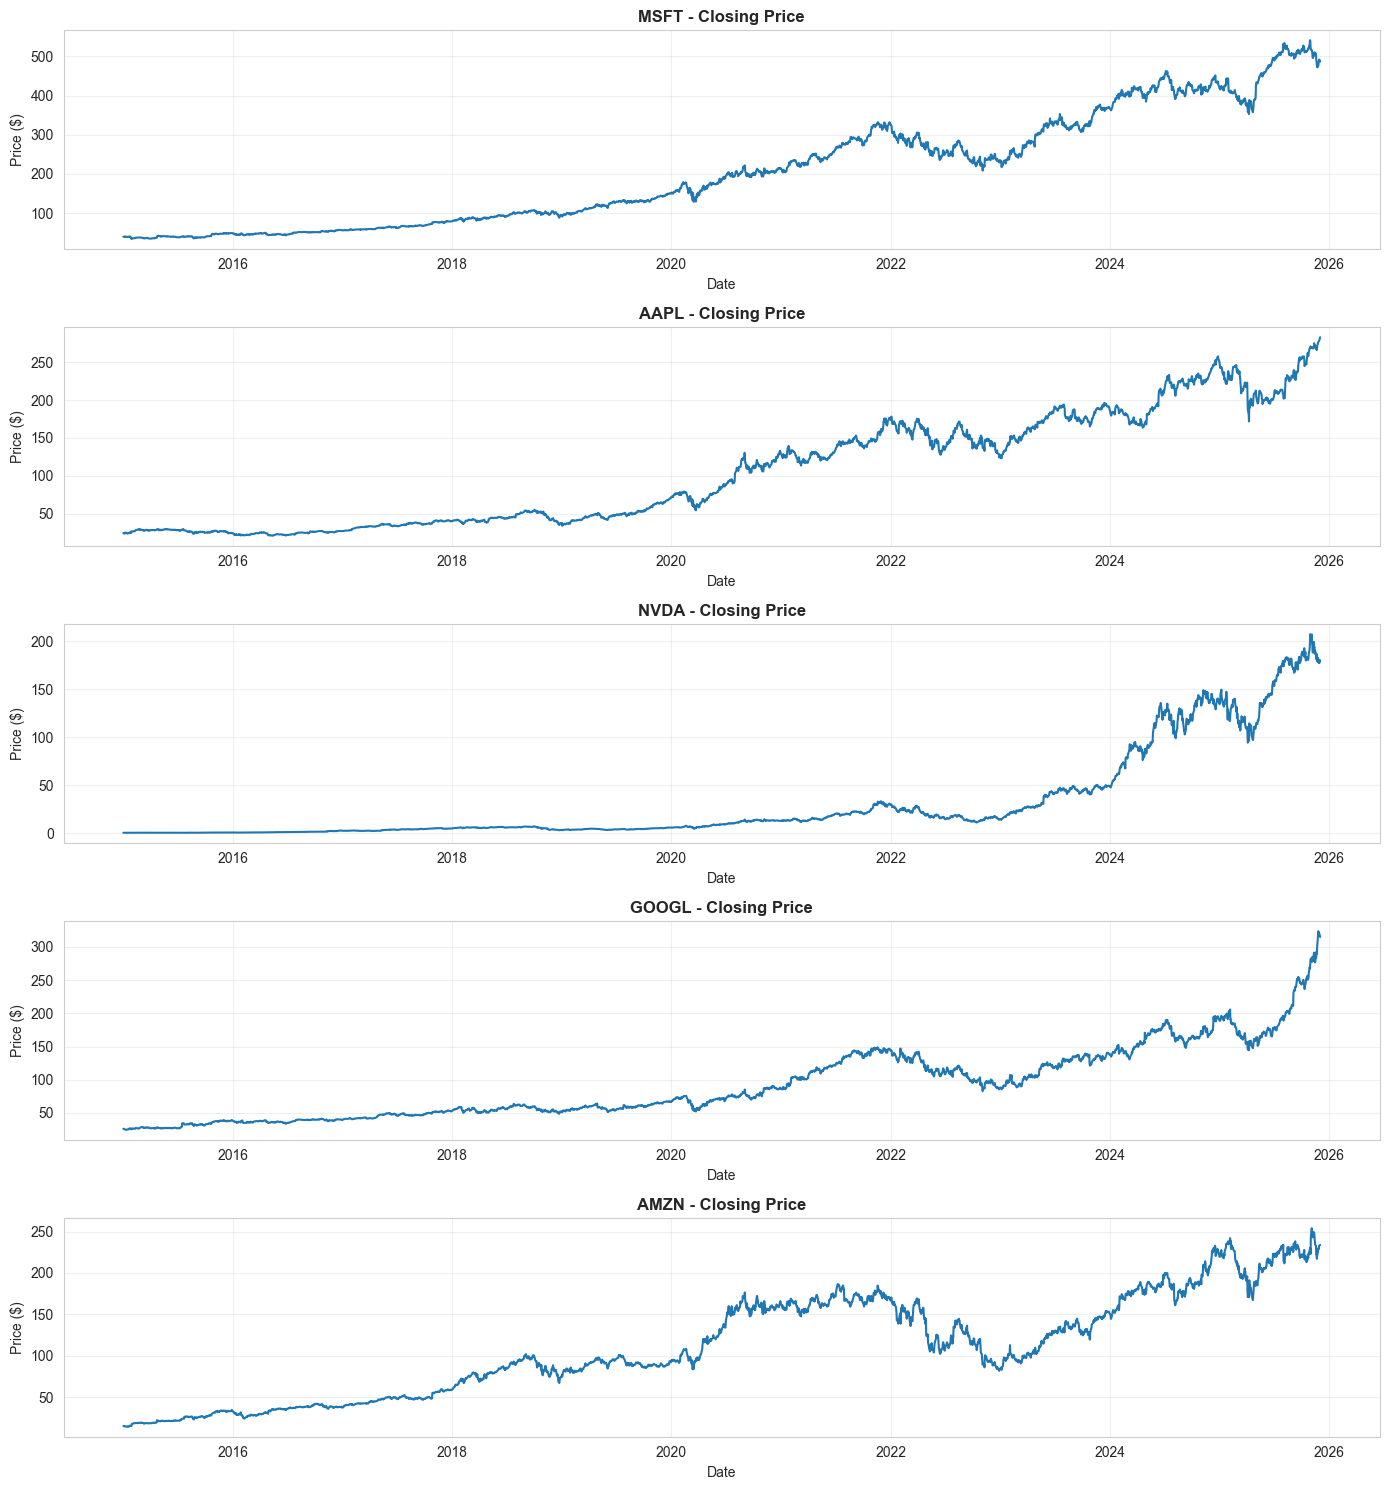

In [5]:
# Plot closing prices for all tickers
fig, axes = plt.subplots(len(TICKERS), 1, figsize=(14, 3*len(TICKERS)))

for i, ticker in enumerate(TICKERS):
    ticker_data = prices_df[prices_df['ticker'] == ticker]
    ax = axes[i] if len(TICKERS) > 1 else axes
    
    ax.plot(ticker_data['Date'], ticker_data['Close'], linewidth=1.5)
    ax.set_title(f'{ticker} - Closing Price', fontsize=12, fontweight='bold')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price ($)')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
safe_savefig_plt('../reports/figures/price_history.png', dpi=150, bbox_inches='tight')
plt.show()

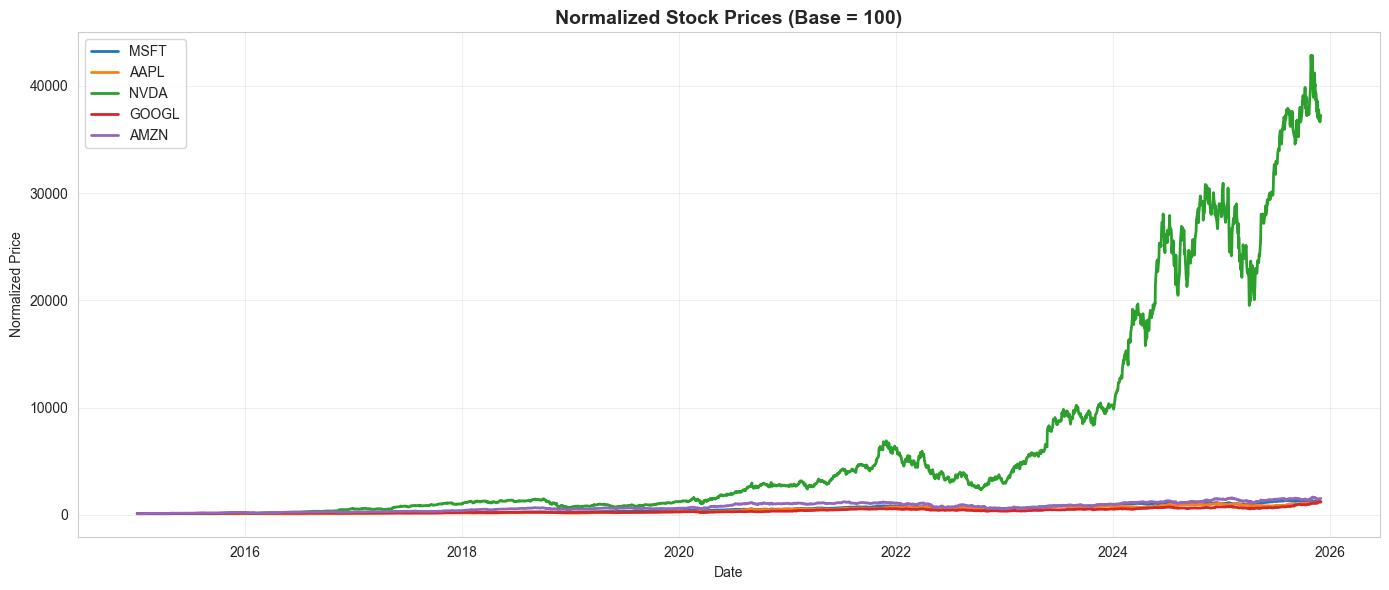

In [6]:
# Normalized prices (to compare relative performance)
plt.figure(figsize=(14, 6))

for ticker in TICKERS:
    ticker_data = prices_df[prices_df['ticker'] == ticker].copy()
    ticker_data = ticker_data.sort_values('Date')
    
    # Normalize to 100 at start
    normalized = (ticker_data['Close'] / ticker_data['Close'].iloc[0]) * 100
    
    plt.plot(ticker_data['Date'], normalized, label=ticker, linewidth=2)

plt.title('Normalized Stock Prices (Base = 100)', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
safe_savefig_plt('../reports/figures/normalized_prices.png', dpi=150, bbox_inches='tight')
plt.show()

## 4. Volume Analysis

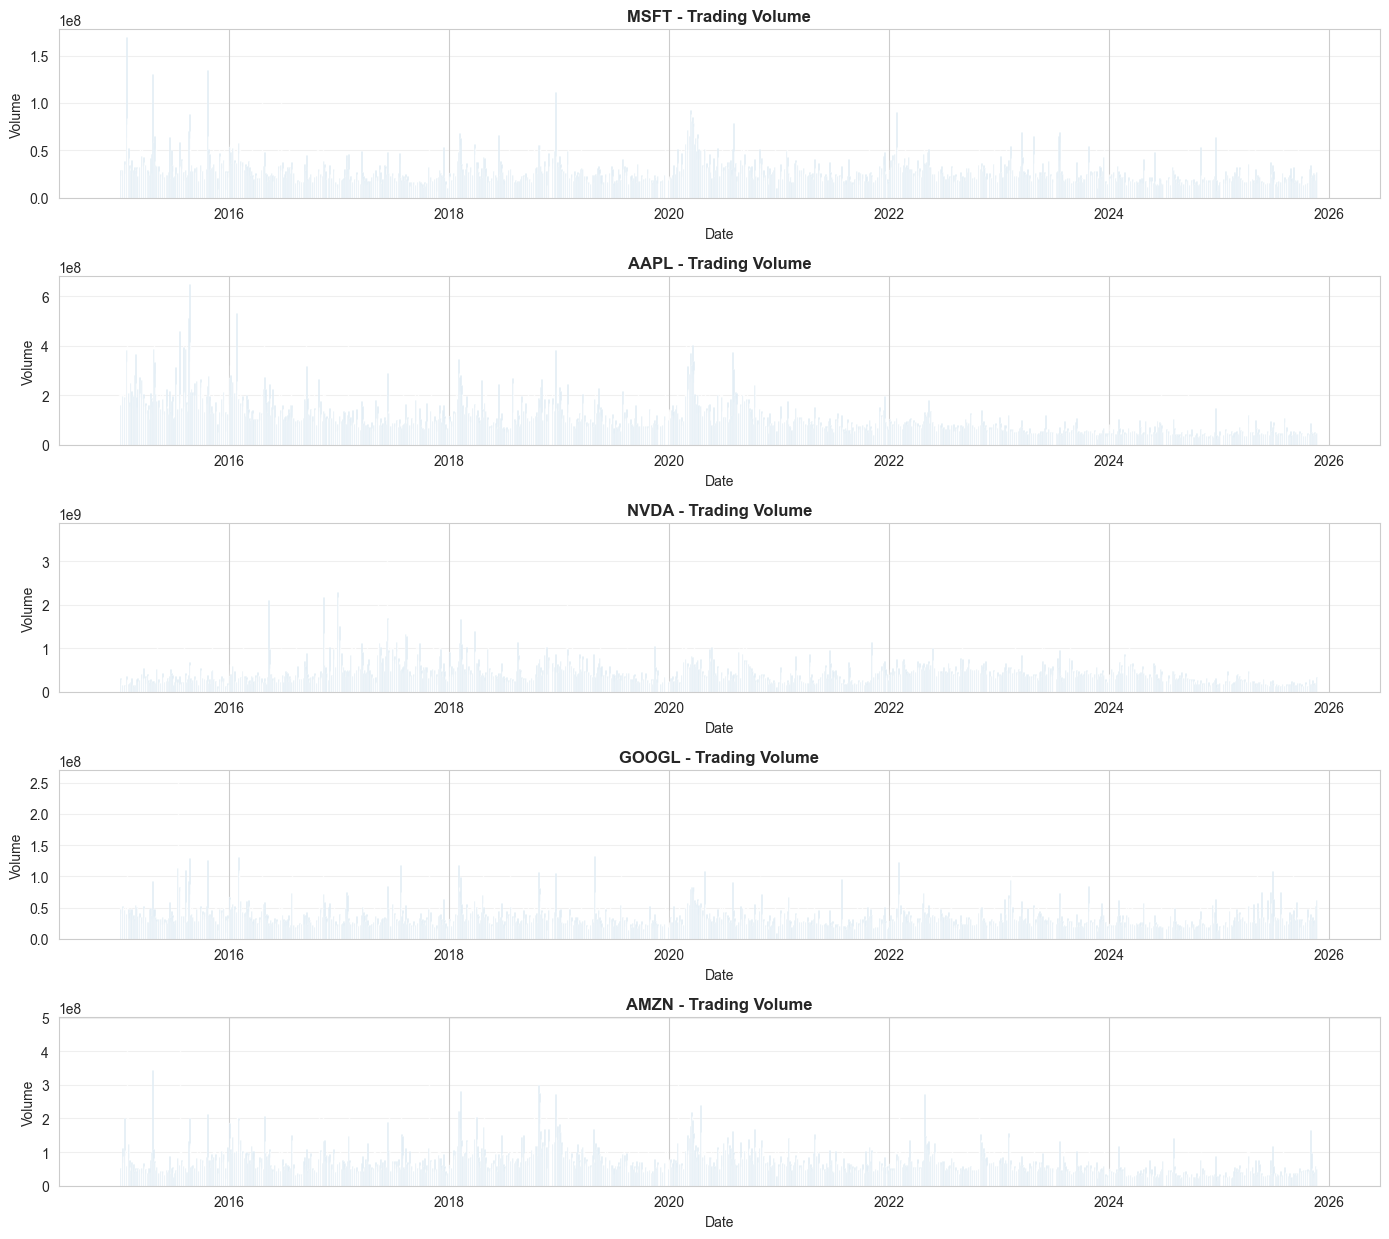

In [7]:
# Plot trading volumes
fig, axes = plt.subplots(len(TICKERS), 1, figsize=(14, 2.5*len(TICKERS)))

for i, ticker in enumerate(TICKERS):
    ticker_data = prices_df[prices_df['ticker'] == ticker]
    ax = axes[i] if len(TICKERS) > 1 else axes
    
    ax.bar(ticker_data['Date'], ticker_data['Volume'], width=1, alpha=0.7)
    ax.set_title(f'{ticker} - Trading Volume', fontsize=12, fontweight='bold')
    ax.set_xlabel('Date')
    ax.set_ylabel('Volume')
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
safe_savefig_plt('../reports/figures/volume_history.png', dpi=150, bbox_inches='tight')
plt.show()

## 5. Returns and Volatility

In [8]:
# Calculate returns for each ticker
returns_data = []

for ticker in TICKERS:
    ticker_data = prices_df[prices_df['ticker'] == ticker].copy()
    ticker_data = ticker_data.sort_values('Date')
    
    ticker_data['return'] = calculate_returns(ticker_data['Close'])
    ticker_data['volatility'] = calculate_volatility(ticker_data['return'], window=20)
    
    returns_data.append(ticker_data)

returns_df = pd.concat(returns_data, ignore_index=True)

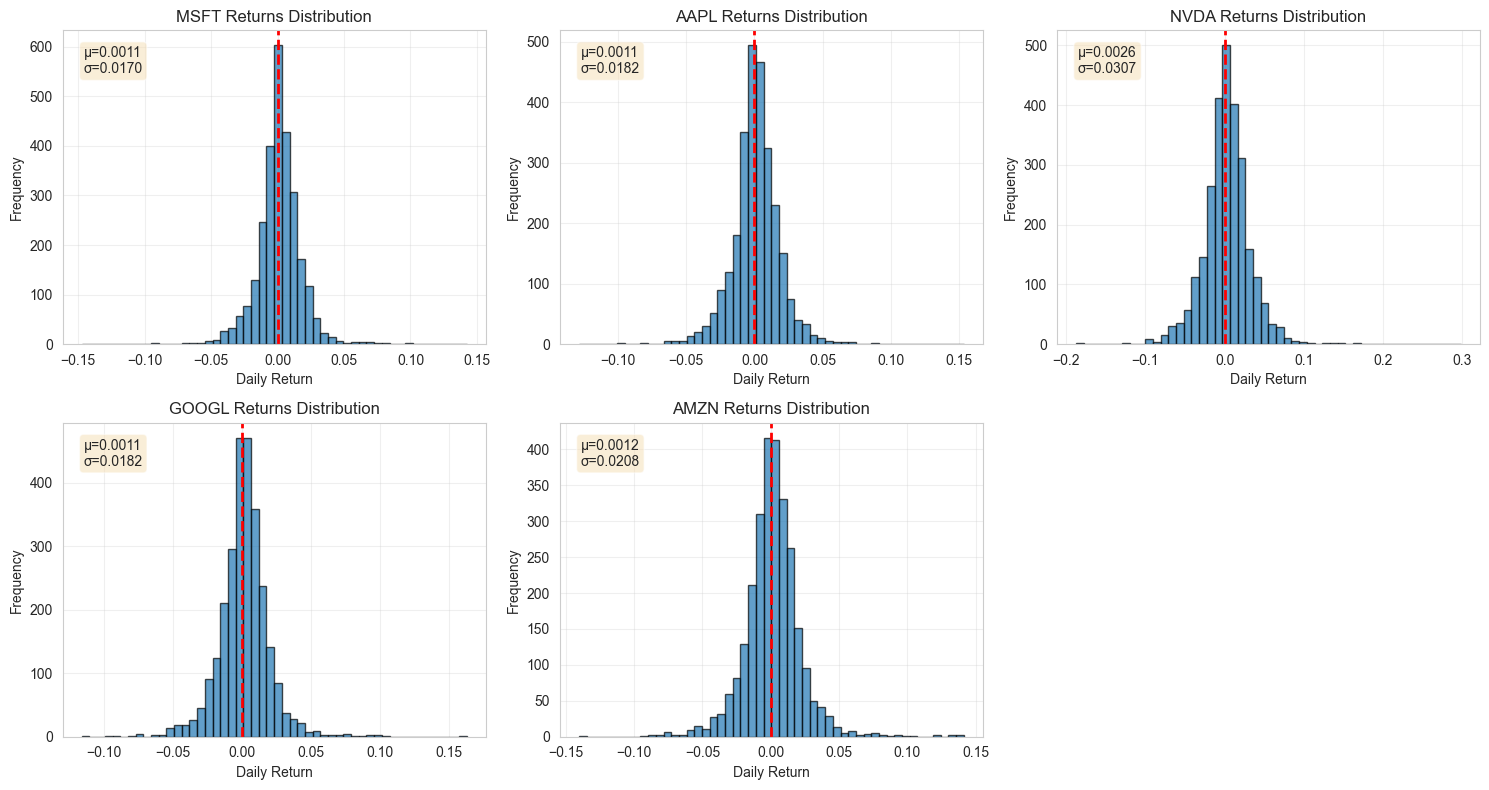

In [9]:
# Distribution of daily returns
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, ticker in enumerate(TICKERS):
    ticker_returns = returns_df[returns_df['ticker'] == ticker]['return'].dropna()
    
    axes[i].hist(ticker_returns, bins=50, edgecolor='black', alpha=0.7)
    axes[i].axvline(0, color='red', linestyle='--', linewidth=2)
    axes[i].set_title(f'{ticker} Returns Distribution')
    axes[i].set_xlabel('Daily Return')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)
    
    # Add statistics
    mean_ret = ticker_returns.mean()
    std_ret = ticker_returns.std()
    axes[i].text(0.05, 0.95, f'μ={mean_ret:.4f}\nσ={std_ret:.4f}',
                transform=axes[i].transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Hide extra subplot
if len(TICKERS) < 6:
    axes[5].axis('off')

plt.tight_layout()
safe_savefig_plt('../reports/figures/returns_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

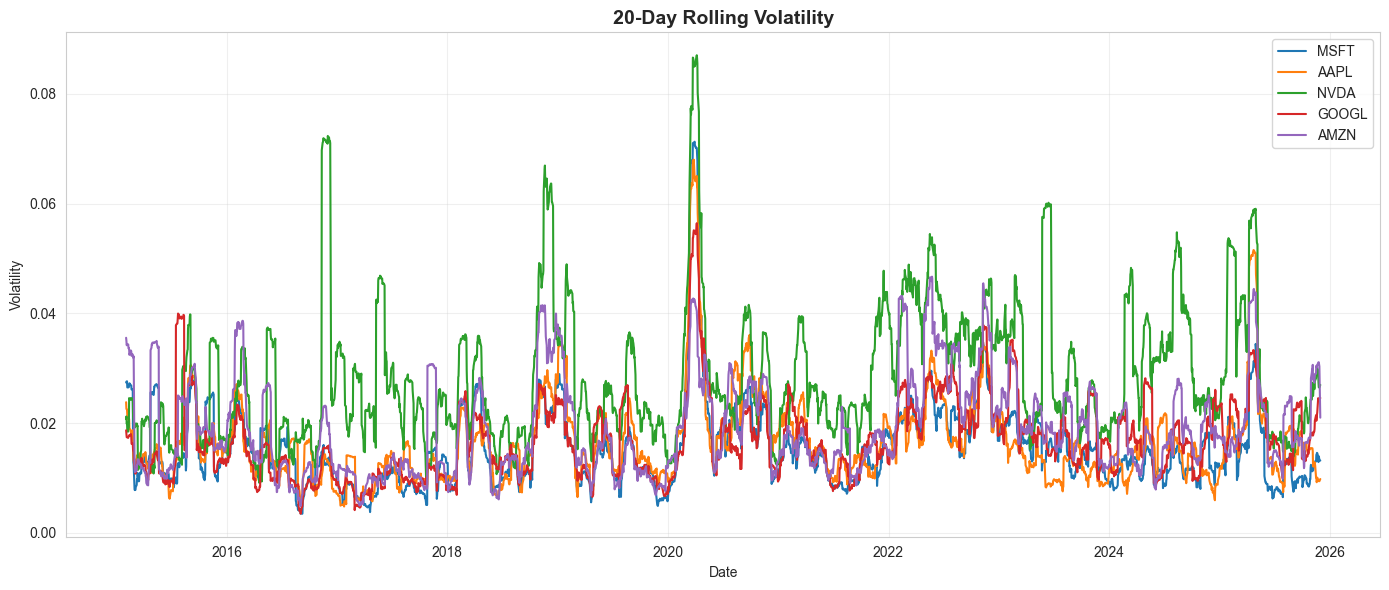

In [10]:
# Rolling volatility
plt.figure(figsize=(14, 6))

for ticker in TICKERS:
    ticker_data = returns_df[returns_df['ticker'] == ticker]
    plt.plot(ticker_data['Date'], ticker_data['volatility'], label=ticker, linewidth=1.5)

plt.title('20-Day Rolling Volatility', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
safe_savefig_plt('../reports/figures/rolling_volatility.png', dpi=150, bbox_inches='tight')
plt.show()

## 6. Correlation Analysis

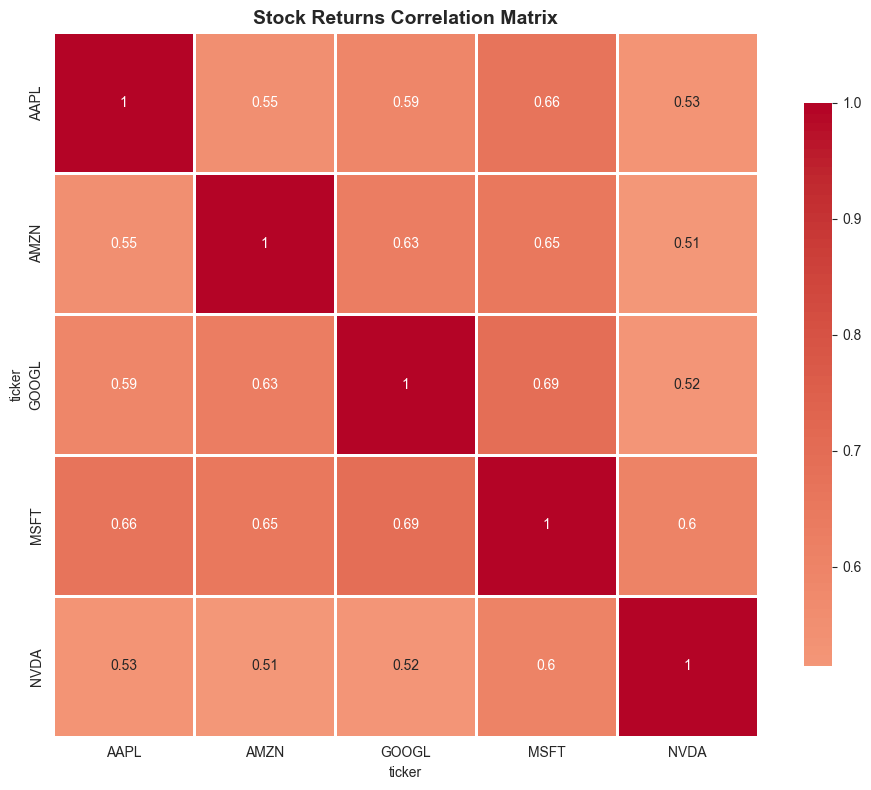

In [11]:
# Create returns matrix
returns_pivot = returns_df.pivot(index='Date', columns='ticker', values='return')

# Correlation matrix
corr_matrix = returns_pivot.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Stock Returns Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
safe_savefig_plt('../reports/figures/correlation_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

## 7. Summary Statistics

In [12]:
# Calculate summary statistics for each ticker
summary_stats = []

for ticker in TICKERS:
    ticker_data = returns_df[returns_df['ticker'] == ticker].copy()
    ticker_returns = ticker_data['return'].dropna()
    
    stats = {
        'Ticker': ticker,
        'Mean Return': ticker_returns.mean(),
        'Std Dev': ticker_returns.std(),
        'Sharpe Ratio': ticker_returns.mean() / ticker_returns.std() * np.sqrt(252),
        'Min Return': ticker_returns.min(),
        'Max Return': ticker_returns.max(),
        'Skewness': ticker_returns.skew(),
        'Kurtosis': ticker_returns.kurtosis()
    }
    summary_stats.append(stats)

summary_df = pd.DataFrame(summary_stats)
summary_df = summary_df.round(4)

print("\nSummary Statistics:")
print(summary_df.to_string(index=False))

# Save to CSV using safe file operation
safe_to_csv(summary_df, '../reports/summary_statistics.csv', index=False)
print("\nSaved summary statistics to reports/summary_statistics.csv")


Summary Statistics:
Ticker  Mean Return  Std Dev  Sharpe Ratio  Min Return  Max Return  Skewness  Kurtosis
  MSFT       0.0011   0.0170        0.9877     -0.1474      0.1422    0.1587    7.9424
  AAPL       0.0011   0.0182        0.9248     -0.1286      0.1533    0.1366    6.5331
  NVDA       0.0026   0.0307        1.3568     -0.1876      0.2981    0.5589    8.2476
 GOOGL       0.0011   0.0182        0.9336     -0.1163      0.1626    0.2577    6.3216
  AMZN       0.0012   0.0208        0.9207     -0.1405      0.1413    0.4126    6.1539

Saved summary statistics to reports/summary_statistics.csv


## Conclusion

This notebook demonstrated:
- Downloading historical stock price data
- Exploratory data analysis of prices and volumes
- Calculating and visualizing returns and volatility
- Correlation analysis between stocks

Next steps:
- Build sentiment features from news/Reddit data (Notebook 02)
- Create supervised learning dataset (Notebook 03)
- Train LSTM models (Notebook 03)